In [1]:
import os

os.environ['TMPDIR'] = '/research/rkhithani/tmp'
os.environ['XDG_CACHE_HOME'] = '/research/rkhithani/.cache'
os.environ['PIP_NO_CACHE_DIR'] = 'off'

import pathlib

pathlib.Path('/research/rkhithani/tmp').mkdir(parents=True, exist_ok=True)
pathlib.Path('/research/rkhithani/.cache').mkdir(parents=True, exist_ok=True)


In [2]:
pip uninstall numpy -y


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip uninstall tensorflow -y

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 120.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 118.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 313.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 163.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 116.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 KB 283.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typing_extensions-4.13.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation

In [6]:
pip install pandas yfinance matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [54]:
ticker = "GOOG"
number_of_years = 20
end_date = datetime(2025, 4, 18)
start_date = end_date - timedelta(days=365*number_of_years)
df = yf.download(ticker, start=start_date, end=end_date)

df = df["Close"]

df

[*********************100%***********************]  1 of 1 completed


Ticker,GOOG
Date,
2005-04-25,5.541137
2005-04-26,5.422644
2005-04-27,5.448176
2005-04-28,5.439997
2005-04-29,5.453631
...,...
2025-04-11,159.399994
2025-04-14,161.470001
2025-04-15,158.679993


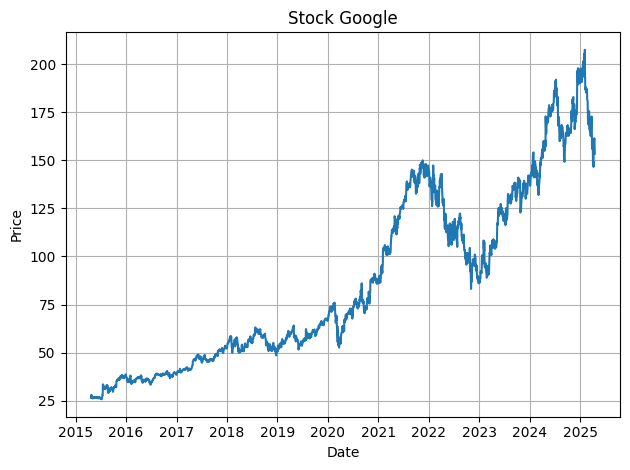

In [9]:
plt.plot(df.index,df)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Google")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
def create_windowed_dataframe(dataframe, start_date, end_date, window_size=3):
  current_date = start_date
  target_dates = []
  feature_windows, targets = [], []

  reached_end = False
  while True:
    # Get a rolling window of data ending at current_date
    window_df = dataframe.loc[:current_date].tail(window_size + 1)

    # Ensure the window has enough rows
    if len(window_df) != window_size + 1:
        print(f'Error: Window of size {window_size} is too large for date {current_date}')
        return

    # Split window into features (X) and target (Y)
    window_values = window_df.to_numpy()
    window_features, window_target = window_values[:-1], window_values[-1]

    # Store date, features, and target
    target_dates.append(current_date)
    feature_windows.append(window_features)
    targets.append(window_target)

    # Move to the next date, assuming a weekly interval
    next_week_df = dataframe.loc[current_date:current_date + timedelta(days=7)]
    next_datetime_str = str(next_week_df.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year, month, day = map(int, next_date_str.split('-'))
    next_date = datetime(day=day, month=month, year=year)

    current_date = next_date

    # Stop if we've reached the final date
    if current_date == end_date:
        reached_end = True

    if reached_end:
        break

  # Create the final DataFrame
  output_df = pd.DataFrame({})
  output_df['Target Date'] = target_dates

  # Convert feature list to NumPy array for column-wise access
  feature_array = np.array(feature_windows)
  for i in range(window_size):
      output_df[f'Target-{window_size - i}'] = feature_array[:, i]

  output_df['Target'] = targets

  return output_df

In [56]:
print(df)
window = 4
first = datetime(2005, 4, 29)
last = datetime(2025, 4, 17)
windowed_df = create_windowed_dataframe(df, first, last, window)
windowed_df
#print(first)
#print(last)
#start_date

Ticker            GOOG
Date                  
2005-04-25    5.541137
2005-04-26    5.422644
2005-04-27    5.448176
2005-04-28    5.439997
2005-04-29    5.453631
...                ...
2025-04-11  159.399994
2025-04-14  161.470001
2025-04-15  158.679993
2025-04-16  155.500000
2025-04-17  153.360001

[5029 rows x 1 columns]


,Target Date,Target-4,Target-3,Target-2,Target-1,Target
0,2005-04-29,5.541137,5.422644,5.448176,5.439997,[5.4536309242248535]
1,2005-05-02,5.422644,5.448176,5.439997,5.453631,[5.510397911071777]
2,2005-05-03,5.448176,5.439997,5.453631,5.510398,[5.607076168060303]
3,2005-05-04,5.439997,5.453631,5.510398,5.607076,[5.664339065551758]
4,2005-05-05,5.453631,5.510398,5.607076,5.664339,[5.626659393310547]
...,...,...,...,...,...,...
5019,2025-04-10,147.740005,149.240005,146.580002,161.059998,[155.3699951171875]
5020,2025-04-11,149.240005,146.580002,161.059998,155.369995,[159.39999389648438]
5021,2025-04-14,146.580002,161.059998,155.369995,159.399994,[161.47000122070312]
5022,2025-04-15,161.059998,155.369995,159.399994,161.470001,[158.67999267578125]


In [57]:
def split_windowed_df(windowed_dataframe):
    # Extract the first column as dates
    date_array = pd.to_datetime(windowed_dataframe.iloc[:, 0]).to_numpy()

    # Extract all columns except the first and last as input features
    feature_matrix = windowed_dataframe.iloc[:, 1:-1].to_numpy().astype(np.float32)

    # Reshape features to 3D array: (samples, time_steps, 1 feature per step)
    X = feature_matrix.reshape((len(date_array), feature_matrix.shape[1], 1))

    # Extract the last column as target values
    y = windowed_dataframe.iloc[:, -1].astype(np.float32).to_numpy().reshape(-1)

    return date_array, X.astype(np.float32), y


dates, X, y = split_windowed_df(windowed_df)

dates.shape, X.shape, y.shape

((5024,), (5024, 4, 1), (5024,))

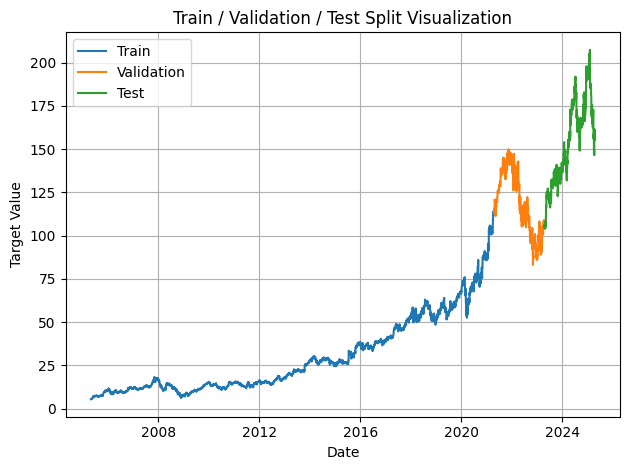

In [58]:
# Calculate indices for 80% training and 90% validation splits
train_end_idx = int(len(dates) * 0.80)
val_end_idx = int(len(dates) * 0.90)

# Split the dataset into training, validation, and testing sets
train_dates, X_train_split, y_train_split = dates[:train_end_idx], X[:train_end_idx], y[:train_end_idx]
val_dates, X_val_split, y_val_split = dates[train_end_idx:val_end_idx], X[train_end_idx:val_end_idx], y[train_end_idx:val_end_idx]
test_dates, X_test_split, y_test_split = dates[val_end_idx:], X[val_end_idx:], y[val_end_idx:]

scaler = MinMaxScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train_split.reshape(-1, X_train_split.shape[1]))
X_train_split = X_train_scaled.reshape(X_train_split.shape)

# Use the same scaler to transform val/test
X_val_scaled = scaler.transform(X_val_split.reshape(-1, X_val_split.shape[1]))
X_val_split = X_val_scaled.reshape(X_val_split.shape)

X_test_scaled = scaler.transform(X_test_split.reshape(-1, X_test_split.shape[1]))
X_test_split = X_test_scaled.reshape(X_test_split.shape)

# Plot the time series target values for each dataset split
plt.plot(train_dates, y_train_split, label='Train')
plt.plot(val_dates, y_val_split, label='Validation')
plt.plot(test_dates, y_test_split, label='Test')

# Display the legend
plt.legend()
plt.xlabel("Date")
plt.ylabel("Target Value")
plt.title("Train / Validation / Test Split Visualization")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((window, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train_split, y_train_split, validation_data=(X_val_split, y_val_split), epochs=100)

Epoch 1/100
126/126 [==============================] - 3s 8ms/step - loss: 633.7597 - mean_absolute_error: 17.0907 - val_loss: 1262.6462 - val_mean_absolute_error: 32.2997
Epoch 2/100
126/126 [==============================] - 1s 4ms/step - loss: 5.1702 - mean_absolute_error: 1.4084 - val_loss: 578.4513 - val_mean_absolute_error: 20.3534
Epoch 3/100
126/126 [==============================] - 1s 4ms/step - loss: 3.6004 - mean_absolute_error: 1.3436 - val_loss: 389.4187 - val_mean_absolute_error: 16.2151
Epoch 4/100
126/126 [==============================] - 1s 4ms/step - loss: 3.1644 - mean_absolute_error: 1.3093 - val_loss: 314.4247 - val_mean_absolute_error: 14.4215
Epoch 5/100
126/126 [==============================] - 1s 4ms/step - loss: 2.9747 - mean_absolute_error: 1.2674 - val_loss: 263.0403 - val_mean_absolute_error: 13.0536
Epoch 6/100
126/126 [==============================] - 1s 4ms/step - loss: 2.4380 - mean_absolute_error: 1.1306 - val_loss: 234.7993 - val_mean_absolute_err

In [42]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 32)                4352      
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6497 (25.38 KB)
Trainable params: 6497 (25.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


16/16 [==============================] - 0s 2ms/step


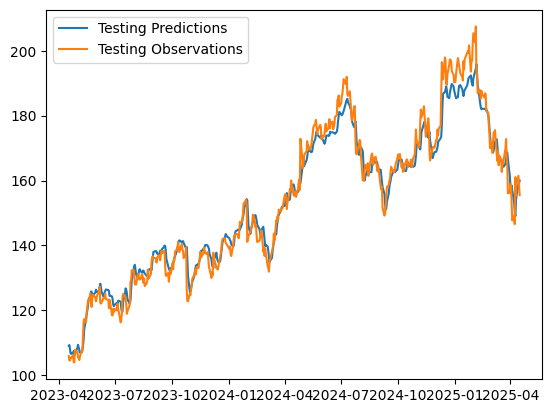

In [60]:
test_predictions = model.predict(X_test_split).flatten()

plt.plot(test_dates, test_predictions)
plt.plot(test_dates, y_test_split)
plt.legend(['Testing Predictions', 'Testing Observations'])